In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas_summary import DataFrameSummary
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

path_list = []
file_list = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path_list.append(os.path.join(dirname, filename))
        file_list.append(filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmann-store-extra/state_names.csv
/kaggle/input/rossmann-store-extra/weather.csv
/kaggle/input/rossmann-store-extra/googletrend.csv
/kaggle/input/rossmann-store-extra/store_states.csv
/kaggle/input/rossmandataproc/train_normalized_data.fth
/kaggle/input/rossmandataproc/test_normalized_data.fth
/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


In [2]:
print(path_list)
print(file_list)

table_names = ['train','test', 'store', 'store_states', 'state_names', 'googletrend', 'weather']
train, test, store = [pd.read_csv('/kaggle/input/rossmann-store-sales/'+ name +'.csv', low_memory=False) for name in table_names[:3]]
store_states, state_names, googletrend, weather = [pd.read_csv('/kaggle/input/rossmann-store-extra/'+ name +'.csv', low_memory=False) for name in table_names[3:]]

pd.set_option('display.max_columns', None)

['/kaggle/input/rossmann-store-extra/state_names.csv', '/kaggle/input/rossmann-store-extra/weather.csv', '/kaggle/input/rossmann-store-extra/googletrend.csv', '/kaggle/input/rossmann-store-extra/store_states.csv', '/kaggle/input/rossmandataproc/train_normalized_data.fth', '/kaggle/input/rossmandataproc/test_normalized_data.fth', '/kaggle/input/rossmann-store-sales/sample_submission.csv', '/kaggle/input/rossmann-store-sales/store.csv', '/kaggle/input/rossmann-store-sales/train.csv', '/kaggle/input/rossmann-store-sales/test.csv']
['state_names.csv', 'weather.csv', 'googletrend.csv', 'store_states.csv', 'train_normalized_data.fth', 'test_normalized_data.fth', 'sample_submission.csv', 'store.csv', 'train.csv', 'test.csv']


In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Importación de datos normalizados a partir de su procesamiento procesamiento

In [4]:
df = pd.read_feather('/kaggle/input/rossmandataproc/train_normalized_data.fth')
df_test = pd.read_feather('/kaggle/input/rossmandataproc/test_normalized_data.fth')

# Elección de variables categóricas y continuas a utilizar para el entrenamiento del modelo

In [5]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

#cat_vars = ['Store', 'DayOfWeek']

contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 'Precipitationmm',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 'Promo', 'SchoolHoliday', 'StateHoliday_bool']

#contin_vars = ['BeforeStateHoliday_bool', 'Max_TemperatureC']

In [6]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]
display(uniques)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_bool_fw,StateHoliday_bool_bw,SchoolHoliday_fw,SchoolHoliday_bw
uniques,1115,7,3,12,31,4,25,26,4,3,4,21,8,12,52,22,6,6,3,3,8,8


In [7]:
cat_var_dict = {'Store': 50, 'DayOfWeek': 2, 'Year': 2, 'Month': 2,
'Day': 10, 'StateHoliday': 2, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 25, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
'StateHoliday_bool_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}

In [8]:
for v in cat_vars:
    uniques_ = df[v].unique()
    uniques_.sort()
    print(v, cat_var_dict[v], len(uniques_), uniques_)
    print()

Store 50 1115 [   0    1    2 ... 1112 1113 1114]

DayOfWeek 2 7 [0 1 2 3 4 5 6]

Year 2 3 [0 1 2]

Month 2 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Day 10 31 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]

StateHoliday 2 4 [0 1 2 3]

CompetitionMonthsOpen 2 25 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]

Promo2Weeks 1 26 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]

StoreType 2 4 [0 1 2 3]

Assortment 3 3 [0 1 2]

PromoInterval 3 4 [0 1 2 3]

CompetitionOpenSinceYear 4 21 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Promo2SinceYear 4 8 [0 1 2 3 4 5 6 7]

State 6 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Week 25 52 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]

Events 4 22 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

# Diseño, configuración y entrenamiento del modelo

In [9]:
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from keras.regularizers import l2

## Creación de capas de Embedding para variables categóricas y capas tipo input para variables continuas

In [10]:
#CATEGÓRICAS
def get_cat_vars_model(cat_vars, uniques, cat_var_dict):
    cat_vars_embed_outs = []
    cat_var_inputs = []
    for cat_var in cat_vars:
        cat_var_in = Input(shape=(1,), name=f"{cat_var}_input")
        cat_var_inputs.append(cat_var_in)
        embed_out = Embedding(uniques[cat_var].iloc[0], cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in)
        flatten_out = Flatten(name=f"{cat_var}_flat")(embed_out)
        cat_vars_embed_outs.append(flatten_out)
    return cat_var_inputs, cat_vars_embed_outs


#CONTINUAS
def get_cont_vars_input(contin_vars, dense_layer=False):
    cont_vars_inputs = []
    cont_vars_outputs = []
    for cont_var in contin_vars:
        cont_var_in = Input(shape=(1,), name=f"{cont_var}_input")
        cont_vars_inputs.append(cont_var_in)
        if dense_layer:
            cont_var_out = Dense(1, name=f"{cont_var}_input", activation = 'linear')(cont_var_in)
            cont_vars_outputs.append(cont_var_out)
        else:
            cont_vars_outputs.append(cont_var_in)
    return cont_vars_inputs, cont_vars_outputs

In [11]:
cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

## Creación del conjunto 'train' y el conjunto 'val'

In [12]:
import datetime

df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

Cantidad en val: 30188, porcentaje: 0.9642465458145908


In [13]:
stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [14]:
df_train = df_train.assign(mean_by_store=df_train['Store'].apply(stores_mean.get))
df_val = df_val.assign(mean_by_store=df_val['Store'].apply(stores_mean.get))

df_train = df_train.assign(Sales_store=df_train['Sales'] - df_train['mean_by_store'])
df_val = df_val.assign(Sales_store=df_val['Sales'] - df_val['mean_by_store'])

In [15]:
from tensorflow.keras import backend as K

def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

def get_metric(df, sales_):
    return np.sqrt((((df['Sales'] - sales_)/df['Sales'])**2).mean())

get_metric(df_val, df_val['mean_by_store'])

0.3071746085338871

## Definición del modelo

In [16]:
output_activation = 'linear'

merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)

x = Dense(units = 2000, activation = 'relu', name = 'dense_0_layer')(merged)
x = BatchNormalization(name='batch_norm_0')(x)
x = Dropout(0.4,name='dropout_0')(x)
x = Dense(units = 1000, activation = 'relu', name = 'dense_1_layer')(x)
x = BatchNormalization(name='batch_norm_1')(x)
x = Dropout(0.4,name='dropout_1')(x)
x = Dense(units = 500, activation = 'relu', name = 'dense_2_layer')(x)
x = BatchNormalization(name='batch_norm_2')(x)
#x = Dropout(0.3,name='dropout_2')(x)
#x = Dense(units = 500, activation = 'relu', name = 'dense_3_layer')(x)
#x = BatchNormalization(name='batch_norm_3')(x)
#x = Dropout(0.3,name='dropout_3')(x)
#x = Dense(units = 1000, activation = 'relu', name = 'dense_4_layer')(x)

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)

model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Store_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ DayOfWeek_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Year_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Month_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Day_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ StateHoliday_input  │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CompetitionMonthsO… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Promo2Weeks_input   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ StoreType_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Assortment_input    │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ PromoInterval_input │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CompetitionOpenSin… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Promo2SinceYear_in… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ State_input         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Week_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Events_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Promo_fw_input      │ (None, 1)         │          0 │ -               

 Total params: 2,868,329 (10.94 MB)

 Trainable params: 2,861,329 (10.92 MB)

 Non-trainable params: 7,000 (27.34 KB)

## Split de datos de 'train' y 'val' junto a su correspondiente normalización

In [17]:
# Modo de creación de datos 'y' de 'train' y 'val'
# mode = 0: se utiliza el devío standar y la media
# mode = 1: se utiiza el valor máximo

mode = 1

In [18]:
all_vars = cat_vars + contin_vars

X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))


y_out_columns = ['Sales', 'Customers']


# Normalización
if mode == 0:
    y_mean = df_train[y_out_columns].mean().values
    y_std = df_train[y_out_columns].std().values
    y_train = (df_train[y_out_columns].values - y_mean)/y_std
    y_val = (df_val[y_out_columns].values - y_mean)/y_std

elif mode == 1:
    y_max = df_train[y_out_columns].max().values
    y_train = df_train[y_out_columns].values/y_max
    y_val = df_val[y_out_columns].values/y_max

y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

## Compile & Fit

Epoch 1/20


I0000 00:00:1732279308.011570     110 service.cc:145] XLA service 0x78ff1400cb70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732279308.011624     110 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732279308.011628     110 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732279317.094230     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_Sales_rmspe improved from inf to 0.48338, saving model to bestmodel.keras
3181/3181 - 45s - 14ms/step - Customers_mse: 0.3286 - Sales_rmspe: 4.0704 - loss: 0.6850 - val_Customers_mse: 0.0030 - val_Sales_rmspe: 0.4834 - val_loss: 0.0077 - learning_rate: 1.0000e-04
Epoch 2/20

Epoch 2: val_Sales_rmspe improved from 0.48338 to 0.47031, saving model to bestmodel.keras
3181/3181 - 19s - 6ms/step - Customers_mse: 0.0047 - Sales_rmspe: 0.6435 - loss: 0.0126 - val_Customers_mse: 0.0026 - val_Sales_rmspe: 0.4703 - val_loss: 0.0070 - learning_rate: 1.0000e-04
Epoch 3/20

Epoch 3: val_Sales_rmspe did not improve from 0.47031
3181/3181 - 18s - 6ms/step - Customers_mse: 0.0028 - Sales_rmspe: 0.5234 - loss: 0.0076 - val_Customers_mse: 0.0023 - val_Sales_rmspe: 0.4999 - val_loss: 0.0065 - learning_rate: 1.0000e-04
Epoch 4/20

Epoch 4: val_Sales_rmspe improved from 0.47031 to 0.20467, saving model to bestmodel.keras
3181/3181 - 18s - 6ms/step - Customers_mse: 9.2415e-04 - Sales_rmspe: 0.

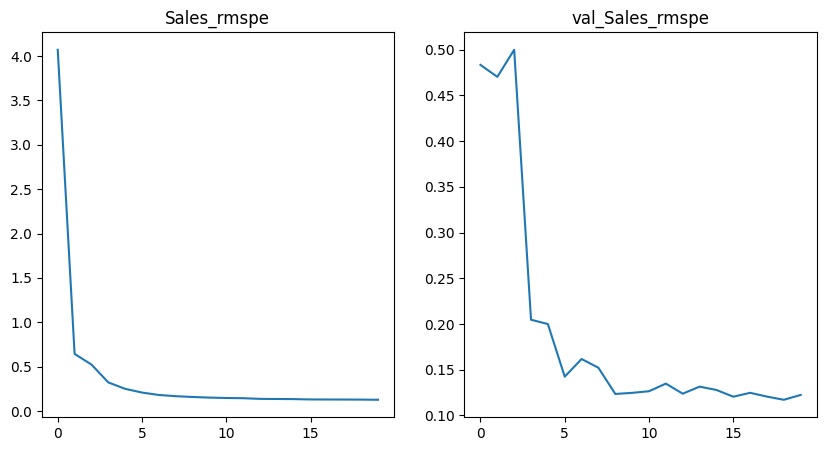

In [19]:
lr = 0.0001
model.compile(optimizer=Adam(learning_rate=lr), metrics=[rmspe,'mse'], loss='mse')

# Callbacks

checkpoint = ModelCheckpoint('bestmodel.keras', monitor='val_Sales_rmspe', verbose=1, save_best_only=True)

rlrop = ReduceLROnPlateau(
    monitor = "val_loss",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 0.00000000001
)

es = EarlyStopping(
    monitor = "val_Sales_rmspe",
    patience = 20,
    verbose = 1,
    restore_best_weights = True,
    mode='min'
)

epochs = 20
batch_size = 256
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),  epochs=epochs, batch_size=batch_size, callbacks=[checkpoint,rlrop,es], verbose=2)


fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1,2,1)
ax.plot(history.history['Sales_rmspe'])
ax.set_title('Sales_rmspe')

ax = fig.add_subplot(1,2,2)
ax.plot(history.history['val_Sales_rmspe'])
ax.set_title('val_Sales_rmspe')

plt.show()

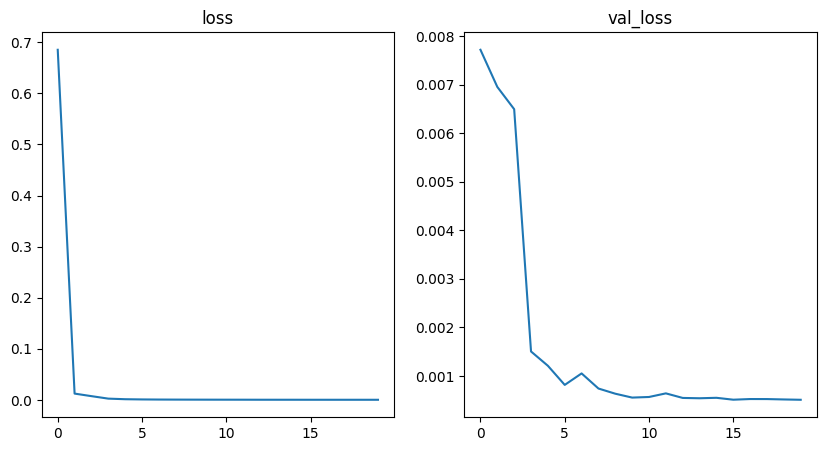

In [20]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1,2,1)
ax.plot(history.history['loss'])
ax.set_title('loss')

ax = fig.add_subplot(1,2,2)
ax.plot(history.history['val_loss'])
ax.set_title('val_loss')

plt.show()

# Cálculo de predicciones a partir del modelo entrenado

In [21]:
if mode == 0:
    y_pred = (model.predict(X_val, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
    y_pred_test = (model.predict(X_test, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
elif mode == 1:
    y_pred = (model.predict(X_val, verbose=1)[0]*y_max[0])[:,0]
    y_pred_test = (model.predict(X_test, verbose=1)[0]*y_max[0])[:,0]

y_pred_test[df_test['Open'] == 0] = 0

944/944 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
1284/1284 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


In [22]:
print(model.predict(X_test, verbose=1)[0][:,0])

1284/1284 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
[0.1090274  0.16781418 0.21623117 ... 0.15873598 0.6552136  0.18015124]


In [23]:
df_entregar = pd.read_csv('/kaggle/input/rossmann-store-sales/sample_submission.csv')
df_entregar["Sales"] = y_pred_test

display(df_entregar)


,Id,Sales
0,1,4530.197754
1,2,6972.847168
2,3,8984.621094
3,4,6587.774414
4,5,7195.761230
...,...,...
41083,41084,3374.508545
41084,41085,7883.803711
41085,41086,6595.638672
41086,41087,27224.779297


In [24]:
df_entregar.to_csv("submission.csv",index=False)